In [3]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import model_selection
from sklearn import tree
import seaborn as sns
import graphviz

In [7]:
iris = datasets.load_iris()
print('Dataset structure= ', dir(iris))

Dataset structure=  ['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [8]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target
df['flower_species'] = df.target.apply(lambda x : iris.target_names[x]) # Each value from 'target' is used as index to get corresponding value from 'target_names' 

print('Unique target values=',df['target'].unique())

df.sample(5)

Unique target values= [0 1 2]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_species
136,6.3,3.4,5.6,2.4,2,virginica
13,4.3,3.0,1.1,0.1,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
17,5.1,3.5,1.4,0.3,0,setosa
126,6.2,2.8,4.8,1.8,2,virginica


In [9]:
#Setosa
df[df.target == 0].head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa


In [10]:
#versicolor
df[df.target == 1].head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_species
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor


In [12]:
#virginica
df[df.target == 2].head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_species
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica


In [16]:
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df[['target']]

print('X Shape',X.shape)
print('Y Shape',y.shape)

X Shape (150, 4)
Y Shape (150, 1)


# Create test & train Dataset

In [18]:
X_train,X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size= 0.2, random_state= 1)
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (120, 4)
X_test dimension=  (30, 4)
y_train dimension=  (120, 1)
y_train dimension=  (30, 1)


In [19]:
#To obtain a deterministic behaviour during fitting always set value for 'random_state' attribute
cls = tree.DecisionTreeClassifier(random_state= 1)
cls.fit(X_train ,y_train)

DecisionTreeClassifier(random_state=1)

In [21]:
print('Actual value of species for 10th test example=',iris.target_names[y_test.iloc[10]][0])
print('Predicted value of species for 10th test example=', iris.target_names[cls.predict([X_test.iloc[10]])][0])

print('\nActual value of species for 20th test example=',iris.target_names[y_test.iloc[20]][0])
print('Predicted value of species for 20th test example=', iris.target_names[cls.predict([X_test.iloc[20]])][0])

print('\nActual value of species for 30th test example=',iris.target_names[y_test.iloc[29]][0])
print('Predicted value of species for 30th test example=', iris.target_names[cls.predict([X_test.iloc[29]])][0])

Actual value of species for 10th test example= versicolor
Predicted value of species for 10th test example= versicolor

Actual value of species for 20th test example= versicolor
Predicted value of species for 20th test example= versicolor

Actual value of species for 30th test example= virginica
Predicted value of species for 30th test example= virginica


C:\Users\DELL\miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\DELL\miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\DELL\miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Modle Score

In [22]:
cls.score(X_test,y_test)

0.9666666666666667

In [ ]:
#Visuliaze the Decision Tree 

[Text(0.4, 0.9166666666666666, 'X[3] <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.5, 0.75, 'X[3] <= 1.65\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(0.2, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.3, 0.4166666666666667, 'X[0] <= 6.05\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.2, 0.25, 'X[3] <= 1.55\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.1, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.5833333333333334, 'X[2] <= 4.85\ngini = 0.048\nsamples = 41\nvalue = [0, 1, 40]'),
 Text(0.7, 0.4166666666666667, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]

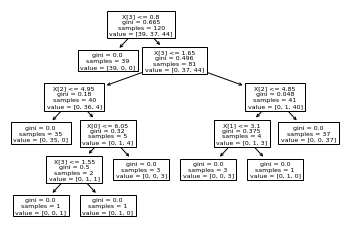

In [23]:
tree.plot_tree(cls)

In [33]:
dot_data = tree.export_graphviz(cls, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris_decision_tree") 

'iris_decision_tree.pdf'

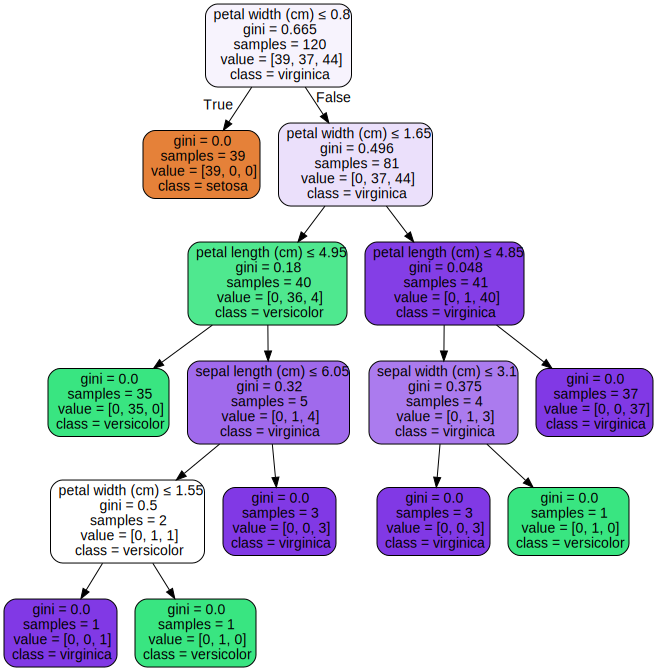

In [34]:
dot_data = tree.export_graphviz(cls, out_file=None, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

# Regression Problem

In [35]:
boston = datasets.load_boston()
print('Dataset structure= ', dir(boston))

df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['target'] = boston.target

df.sample(5)

Dataset structure=  ['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']


C:\Users\DELL\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
202,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
208,0.13587,0.0,10.59,1.0,0.489,6.064,59.1,4.2392,4.0,277.0,18.6,381.32,14.66,24.4
338,0.03306,0.0,5.19,0.0,0.515,6.059,37.3,4.8122,5.0,224.0,20.2,396.14,8.51,20.6
394,13.35980,0.0,18.10,0.0,0.693,5.887,94.7,1.7821,24.0,666.0,20.2,396.90,16.35,12.7
375,19.60910,0.0,18.10,0.0,0.671,7.313,97.9,1.3163,24.0,666.0,20.2,396.90,13.44,15.0


In [39]:
#Lets create feature matrix X  and y labels
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = df[['target']]

print('X shape=', X.shape)
print('y shape=', y.shape)

X shape= (506, 13)
y shape= (506, 1)


In [40]:
#train & test Split
X_train,X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size= 0.2, random_state= 1)
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (404, 13)
X_test dimension=  (102, 13)
y_train dimension=  (404, 1)
y_train dimension=  (102, 1)


In [ ]:
"""
To obtain a deterministic behaviour during fitting always set value for 'random_state' attribute
To keep the tree simple I am using max_depth = 3
Also note that default value of criteria to split the data is 'mse' (mean squared error)
mse is equal to variance reduction as feature selection criterion and minimizes the L2 loss using the mean of each terminal node
"""

In [72]:
dtr = tree.DecisionTreeRegressor(max_depth= 3,splitter= 'random',random_state= 1)
dtr.fit(X_train ,y_train)

DecisionTreeRegressor(max_depth=3, random_state=1, splitter='random')

In [73]:
predicted_price= pd.DataFrame(dtr.predict(X_test), columns=['Predicted Price'])
actual_price = pd.DataFrame(y_test, columns=['target'])
actual_price = actual_price.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([actual_price,predicted_price],axis =1)
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
target,28.200000,23.900000,16.600000,22.000000,20.800000,23.000000,27.900000,14.500000,21.500000,22.600000,...,13.600000,22.900000,10.900000,18.900000,22.400000,22.900000,44.800000,21.700000,10.200000,15.400000
Predicted Price,28.708889,28.708889,17.186087,22.126786,22.126786,22.126786,33.551163,22.126786,17.186087,22.126786,...,17.186087,22.126786,17.186087,22.126786,22.126786,22.126786,44.385714,22.126786,17.186087,17.186087


In [74]:
dtr.score(X_test, y_test)

0.7684584618623297

[Text(0.5, 0.875, 'X[12] <= 9.725\nsquared_error = 80.781\nsamples = 404\nvalue = 22.522'),
 Text(0.25, 0.625, 'X[5] <= 7.437\nsquared_error = 73.352\nsamples = 169\nvalue = 29.659'),
 Text(0.125, 0.375, 'X[7] <= 1.485\nsquared_error = 40.799\nsamples = 147\nvalue = 27.465'),
 Text(0.0625, 0.125, 'squared_error = 0.0\nsamples = 4\nvalue = 50.0'),
 Text(0.1875, 0.125, 'squared_error = 27.338\nsamples = 143\nvalue = 26.834'),
 Text(0.375, 0.375, 'X[5] <= 8.589\nsquared_error = 43.794\nsamples = 22\nvalue = 44.318'),
 Text(0.3125, 0.125, 'squared_error = 20.808\nsamples = 21\nvalue = 45.386'),
 Text(0.4375, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 21.9'),
 Text(0.75, 0.625, 'X[12] <= 16.085\nsquared_error = 23.162\nsamples = 235\nvalue = 17.39'),
 Text(0.625, 0.375, 'X[2] <= 3.985\nsquared_error = 9.361\nsamples = 118\nvalue = 20.343'),
 Text(0.5625, 0.125, 'squared_error = 20.712\nsamples = 8\nvalue = 25.162'),
 Text(0.6875, 0.125, 'squared_error = 6.724\nsamples = 110\nvalue = 

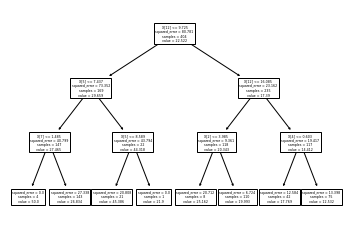

In [68]:
tree.plot_tree(dtr) 

In [69]:
dot_data = tree.export_graphviz(dtr, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("boston_decision_tree") 

'boston_decision_tree.pdf'

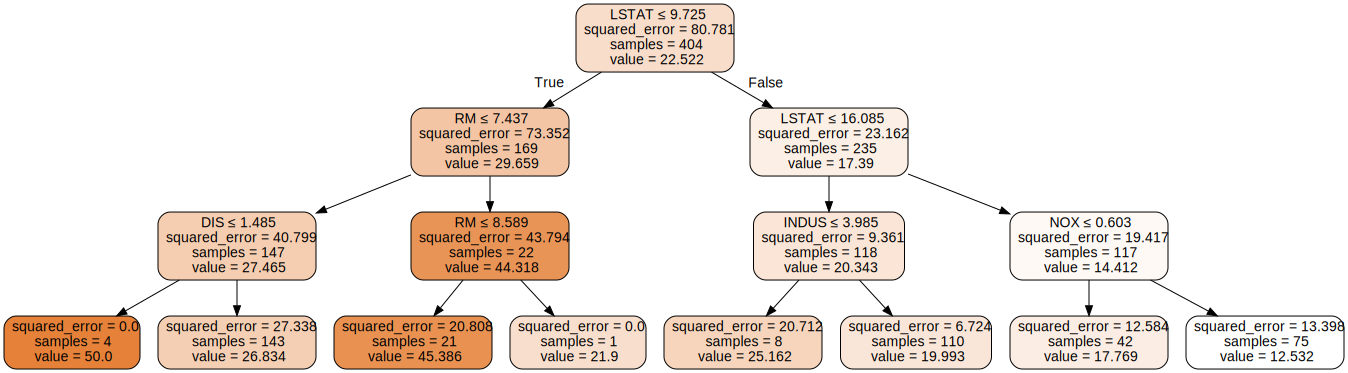

In [70]:
dot_data = tree.export_graphviz(dtr, out_file=None, 
                      feature_names=boston.feature_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 